In [79]:
# 导入必要的库
!pip install python-binance

import pandas as pd  # 用于数据处理和分析
import numpy as np  # 用于数值计算
from binance.client import Client  # 用于访问Binance API
import sys  # 用于系统操作
import traceback  # 用于追踪错误
import os

In [81]:

# 临时设置环境变量
os.environ["BINANCE_API_KEY"] = "your_actual_binance_api_key"
os.environ["BINANCE_SECRET_KEY"] = "your_actual_binance_secret_key"

# 从环境变量中获取API密钥和秘密密钥
BINANCE_API_KEY = os.getenv("BINANCE_API_KEY")
BINANCE_SECRET_KEY = os.getenv("BINANCE_SECRET_KEY")

# 检查是否成功获取到密钥
if not BINANCE_API_KEY or not BINANCE_SECRET_KEY:
    raise ValueError("API key and secret key must be set as environment variables")

# 初始化Binance客户端
client = Client(BINANCE_API_KEY, BINANCE_SECRET_KEY)


In [83]:

# 获取所有交易对的列表
coinList = client.get_all_tickers()
# 过滤出以"USDT"结尾的交易对（例如BTCUSDT, ETHUSDT）
assets = [coin["symbol"] for coin in coinList if coin["symbol"].endswith("USDT")]


Config module imported successfully.
RUN configuration: {'folder': 'raw_data_4_hour/', 'reports': 'reports/', 'alpha': 0.038, 'beta': 0.24, 'seed': 353598215, 'commission fee': 0.001, 'b_window': 5, 'f_window': 2, 'b_lim_sup_window': 6, 'f_lim_sup_window': 6, 'back_test_start': Timestamp('2022-01-01 00:00:00'), 'back_test_end': Timestamp('2022-03-31 00:00:00'), 'suffix': 'ncr', 'stop_loss': 0.05, 'off_label_set': [], 'balance_algo': 'srs', 'loss_func': 'categorical', 'epochs': 32}
OK
OK


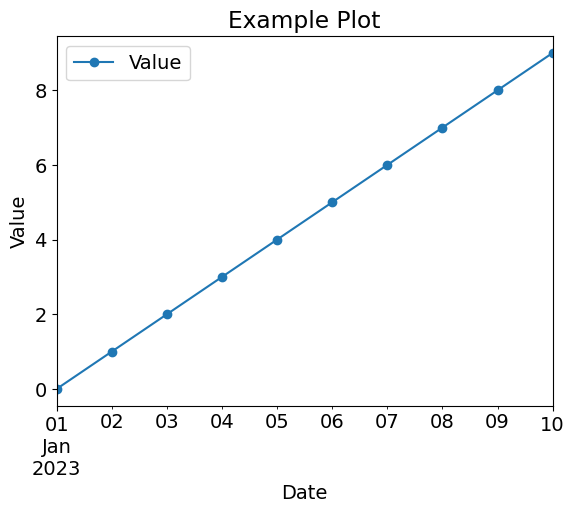

alpha: 0.0377
beta: 0.1942


In [85]:
import pandas as pd
from binance.client import Client
import os
import sys
import matplotlib.pyplot as plt

# 将 config.py 所在目录添加到 sys.path（假设 config.py 和 notebook 在同一目录下）
sys.path.append('C:/Users/HW/Desktop/mechine learning')

# 尝试导入配置模块
try:
    from config import RUN as run_conf
    print("Config module imported successfully.")
    print(f"RUN configuration: {run_conf}")  # 打印配置值
except ModuleNotFoundError as e:
    print(f"Module not found: {e}")
    run_conf = None
except ImportError as e:
    print(f"Import error: {e}")
    run_conf = None

# 设置绘图的默认字体大小
plt.rcParams['font.size'] = 14

# 初始化Binance客户端（请确保已经设置好环境变量或直接填入你的API密钥）
client = Client(api_key="your_binance_api_key", api_secret="your_binance_secret_key")

# 定义一个函数来获取市场数据（调整为1年）
def get_market_data(symbol, interval=Client.KLINE_INTERVAL_4HOUR, lookback="1 year ago UTC"):
    try:
        klines = client.get_historical_klines(symbol, interval, lookback)
        if len(klines) > 0:
            trades = pd.DataFrame(klines)
            trades = trades.iloc[:, :6]
            trades.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]
            trades["Date"] = pd.to_datetime(trades["Date"], unit="ms")
            trades = trades.set_index("Date")
            for col in trades.columns:
                trades[col] = pd.to_numeric(trades[col], errors='coerce')
            trades['Asset_name'] = symbol
            return trades
        else:
            print(f"No data for {symbol}")
            return None
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None

# 确保目录存在
directory = 'asset_data/raw_data_4_hour'
os.makedirs(directory, exist_ok=True)

# 假设 assets 是已经定义好的列表
assets = ['BTCUSDT', 'ETHUSDT']  # 示例交易对

# 遍历所有USDT交易对
for i in range(len(assets)):
    print(f"Downloading {assets[i]} data {round((i / len(assets)) * 10000) / 100}% done")
    data = get_market_data(assets[i])
    if isinstance(data, pd.DataFrame):
        print('OK')
        filename = os.path.join(directory, f'{assets[i]}.csv')
        data.to_csv(filename)
    else:
        print(f"Failed to get data for {assets[i]}")

# 示例数据处理和绘图（如果有需要）
if run_conf:
    def get_dataset(config):
        # 根据配置创建示例数据集
        return pd.DataFrame({
            'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
            'Value': range(10)
        })

    # 从配置文件中获取数据集
    df = get_dataset(run_conf)

    # 检查 df 是否定义，并处理数据
    if df is not None:
        # 将“Date”列转换为日期时间格式
        df["Date"] = pd.to_datetime(df["Date"])

        # 示例：绘制数据
        df.plot(x='Date', y='Value', marker='o')
        plt.title('Example Plot')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.show()
    else:
        print("No data to display.")
# 计算 alpha 和 beta 阈值
if run_conf:
    df = pd.read_csv(f"processed_data/{run_conf['folder'].replace('/', '_')}train_test_data.csv", index_col=0)
    
    intl_hold = 0.85  # hold strip threshold
    intl_buy_sell = 0.997  # buy/sell limits

    alpha = df["pct_change"].abs().quantile(intl_hold)
    beta = df["pct_change"].abs().quantile(intl_buy_sell)

    print("alpha: %.4f" % alpha)
    print("beta: %.4f" % beta)

In [138]:
!pip install pandas_ta

     ---------------------------------------- 0.0/115.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/115.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/115.1 kB ? eta -:--:--
     ---------------------------------------- 0.0/115.1 kB ? eta -:--:--
     ---------- ---------------------------- 30.7/115.1 kB 1.3 MB/s eta 0:00:01
     ------------------- ----------------- 61.4/115.1 kB 825.8 kB/s eta 0:00:01
     -----------------------------------  112.6/115.1 kB 939.4 kB/s eta 0:00:01
     ------------------------------------ 115.1/115.1 kB 672.1 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218928 sha256=b5a1cadc324c6bbef10dd6b8c790e7f98015d7c9b745b4d4b4a79fbca201ae12
  Stored in directory: c:\users\hw\appdata\local\pip\cache\wheels\fd\ed\18\2a12fd1b7906c63efca6accb351929f2c7f6bbc674e1c0ba5d


In [155]:
!pip install wheel

In [161]:
!pip install python_dateutil-2.5.3-py2.py3-none-any.whl

Processing c:\users\hw\desktop\mechine learning\python_dateutil-2.5.3-py2.py3-none-any.whl


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\HW\\Desktop\\mechine learning\\python_dateutil-2.5.3-py2.py3-none-any.whl'



In [163]:
import pandas as pd
from binance.client import Client
import os
import sys
import matplotlib.pyplot as plt
from compute_indicators_labels_lib import preprocess
from model_train_test_lib import train_test
from backtest_coins_lib import backtest_all_coins
from config import RUN
from copy import deepcopy
from collections import defaultdict
import numbers

# 将 config.py 所在目录添加到 sys.path（假设 config.py 和 notebook 在同一目录下）
sys.path.append('C:/Users/HW/Desktop/mechine learning')

# 尝试导入配置模块
try:
    from config import RUN as run_conf
    print("Config module imported successfully.")
    print(f"RUN configuration: {run_conf}")  # 打印配置值
except ModuleNotFoundError as e:
    print(f"Module not found: {e}")
    run_conf = None
except ImportError as e:
    print(f"Import error: {e}")
    run_conf = None

# 设置绘图的默认字体大小
plt.rcParams['font.size'] = 14

# 初始化Binance客户端
client = Client(api_key="your_binance_api_key", api_secret="your_binance_secret_key")

# 定义函数来获取市场数据（调整为1年）
def get_market_data(symbol, interval=Client.KLINE_INTERVAL_4HOUR, lookback="1 year ago UTC"):
    try:
        klines = client.get_historical_klines(symbol, interval, lookback)
        if len(klines) > 0:
            trades = pd.DataFrame(klines)
            trades = trades.iloc[:, :6]
            trades.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]
            trades["Date"] = pd.to_datetime(trades["Date"], unit="ms")
            trades = trades.set_index("Date")
            for col in trades.columns:
                trades[col] = pd.to_numeric(trades[col], errors='coerce')
            trades['Asset_name'] = symbol
            return trades
        else:
            print(f"No data for {symbol}")
            return None
    except Exception as e:
        print(f"Error fetching data for {symbol}: {e}")
        return None

# 确保目录存在
directory = 'asset_data/raw_data_4_hour'
os.makedirs(directory, exist_ok=True)

# 假设 assets 是已经定义好的列表
assets = ['BTCUSDT', 'ETHUSDT']  # 示例交易对

# 遍历所有USDT交易对
for i in range(len(assets)):
    print(f"Downloading {assets[i]} data {round((i / len(assets)) * 10000) / 100}% done")
    data = get_market_data(assets[i])
    if isinstance(data, pd.DataFrame):
        print('OK')
        filename = os.path.join(directory, f'{assets[i]}.csv')
        data.to_csv(filename)
    else:
        print(f"Failed to get data for {assets[i]}")

# 网格搜索和模型训练部分
run_conf = deepcopy(RUN)
final_rep = defaultdict(list)

for bw in range(1, run_conf['b_lim_sup_window']):
    for fw in range(1, run_conf['f_lim_sup_window']):
        run_conf['b_window'] = bw
        run_conf['f_window'] = fw
        for i in range(0, 3):
            rep_res, rep_fields = train_test(run_conf)
            res_strat = backtest_all_coins(run_conf)
            res_strat.drop(columns=['asset_name'], inplace=True)
            print(rep_res)
            
            for rep in rep_res:
                for k, v in zip(rep_fields, rep):
                    final_rep[k].append("%.3f" % v if isinstance(v, numbers.Number) else str(v))
            
            # add stats for strategy
            cols = list(res_strat.columns)
            min_d = res_strat.min(axis=0)
            max_d = res_strat.max(axis=0)
            med_d = res_strat.median(axis=0)
            mean_d = res_strat.mean(axis=0)
            std_d = res_strat.std(axis=0)
            
            row = ['stat']
            row.extend(cols)
            row.extend([""] * (len(final_rep) - len(cols) - 1))
            
            for k, v in zip(rep_fields, row):
                final_rep[k].append(v)
                
            stats = {'min': min_d, 'max': max_d, 'mean': mean_d, 'median': med_d, 'stDev': std_d}
            
            for r in stats:
                row = [r]
                row.extend(stats[r].tolist())
                row.extend([""] * (len(final_rep) - len(cols) - 1))
                for k, v in zip(rep_fields, row):
                    final_rep[k].append(v)
            
            for k in final_rep:
                final_rep[k].append("")
                
        for j in range(0, 2):
            for k in final_rep:
                final_rep[k].append("")

        df_part = pd.DataFrame(final_rep)
        print("Partial results:")
        print(df_part.head())
        
df_final = pd.DataFrame(final_rep)
print("Final results:")
print(df_final.head())

ModuleNotFoundError: No module named 'talib'